# `ApJdataFrames` 
Devor et al. 2008
---
`Title`: IDENTIFICATION, CLASSIFICATIONS, AND ABSOLUTE PROPERTIES OF 773 ECLIPSING BINARIES FOUND IN THE TRANS-ATLANTIC EXOPLANET SURVEY  
`Authors`: Jonathan Devor, David Charbonneau, Francis T O'Donovan, Georgi Mandushev, and Guillermo Torres  


Data is from this paper:  
http://iopscience.iop.org/article/10.1088/0004-6256/135/3/850/


In [1]:
import pandas as pd

In [2]:
from astropy.io import ascii, votable, misc

### Download Data

In [3]:
#! mkdir ../data/Devor2008

In [4]:
#! curl http://iopscience.iop.org/1538-3881/135/3/850/suppdata/aj259648_mrt7.txt >> ../data/Devor2008/aj259648_mrt7.txt

In [5]:
! du -hs ../data/Devor2008/aj259648_mrt7.txt

296K	../data/Devor2008/aj259648_mrt7.txt


Not too big at all.

### Data wrangle-- read in the data

In [6]:
dat = ascii.read('../data/Devor2008/aj259648_mrt7.txt')

In [7]:
! head ../data/Devor2008/aj259648_mrt7.txt

Title: Identification, Classifications, and Absolute Properties of 773 Eclipsing 
       Binaries Found in the TrES Survey 
Authors: Devor J., Charbonneau D., O'Donovan F.T., Mandushev G., Torres G. 
Table: Eclipsing Binary catalog
Byte-by-byte Description of file: datafile7.txt
--------------------------------------------------------------------------------
   Bytes Format Units     Label  Explanations
--------------------------------------------------------------------------------
   1- 13 A13    ---       Cat    Category (see Section 2)


In [8]:
dat.info

//anaconda/lib/python3.4/site-packages/astropy/table/column.py:268: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self.data.__eq__(other)


<Table length=876>
 name   dtype     unit                          description                        
------ ------- --------- ----------------------------------------------------------
   Cat   str13                                             Category (see Section 2)
  Name   str12                                               Binary designation (1)
   RAh   int64         h                            Hour of Right Ascension (J2000)
   RAm   int64       min                          Minute of Right Ascension (J2000)
   RAs float64         s                          Second of Right Ascension (J2000)
   DEd   int64       deg                              Degree of Declination (J2000)
   DEm   int64    arcmin                           Arcminute of Declination (J2000)
   DEs float64    arcsec                           Arcsecond of Declination (J2000)
   Per float64         d                                             Orbital period
 e_Per float64         d                                 

In [9]:
df = dat.to_pandas()

In [10]:
df.head()

,Cat,Name,RAh,RAm,RAs,DEd,DEm,DEs,Per,e_Per,...,Dis,AV,sini,ecosw,Ec,errEc,Delm1,Epoch1,Delm2,Epoch2
0,Circular,T-And0-00194,1,20,12.816,48,36,41.36,2.144842,0.000082,...,429.310,0.075,0.99673,0.0,0.0,-1.0,0.200,52908.101,0.038,52907.029
1,Circular,T-And0-00459,1,11,24.845,46,57,49.44,3.655130,0.000240,...,373.150,0.431,0.99786,0.0,0.0,-1.0,0.475,52905.439,0.462,52907.266
2,Ambig-equal,T-And0-00657,1,6,6.159,47,31,59.37,13.455900,0.003200,...,784.911,0.028,0.99832,0.0,0.0,-1.0,0.134,52903.924,0.134,52897.196
3,Ambig-unequal,T-And0-00657,1,6,6.159,47,31,59.37,6.724600,0.003200,...,777.616,0.207,0.99954,0.0,0.0,-1.0,0.117,52903.929,0.007,52907.291
4,Circular,T-And0-00745,1,3,45.076,44,50,41.14,2.851320,0.000150,...,746.666,0.000,0.97895,0.0,0.0,-1.0,0.053,52906.421,0.021,52907.847


In [11]:
df.columns

Index(['Cat', 'Name', 'RAh', 'RAm', 'RAs', 'DEd', 'DEm', 'DEs', 'Per', 'e_Per',
       'M1', 'errM1', 'M2', 'errM2', 'Age', 'errAge', 'Score', 'Iso', 'Weight',
       'PM', 'pmRA', 'pmDE', 'Lerror', 'Bmag', 'Rmag', '3rd', 'Jmag', 'Hmag',
       'Kmag', 'JMag', 'HMag', 'KMag', 'Dis', 'AV', 'sini', 'ecosw', 'Ec',
       'errEc', 'Delm1', 'Epoch1', 'Delm2', 'Epoch2'],
      dtype='object')

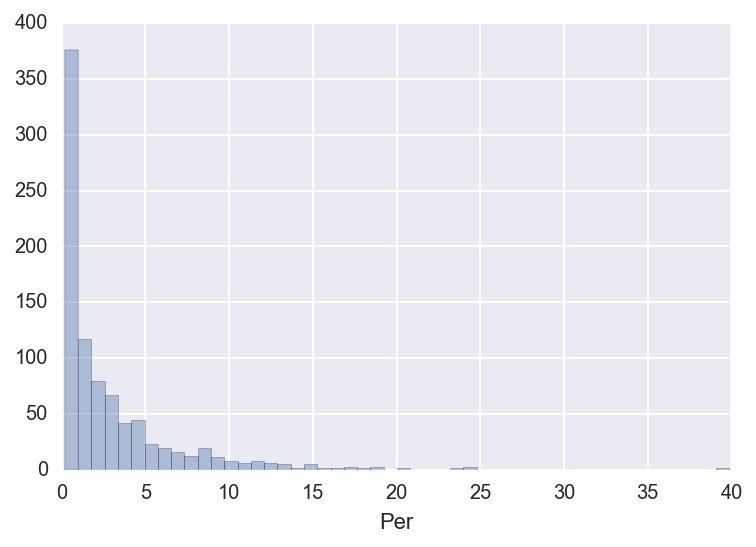

In [12]:
sns.distplot(df.Per, norm_hist=False, kde=False)

## Look for LkCa 4

In [13]:
gi = (df.RAh == 4) & (df.RAm == 16) & (df.DEd == 28) & (df.DEm == 7)

In [14]:
gi.sum()

1

In [15]:
df[gi].T

,782
Cat,Roche-filled
Name,T-Tau0-01262
RAh,4
RAm,16
RAs,28.109
DEd,28
DEm,7
DEs,35.81
Per,6.74215
e_Per,0.00067


The source is named `T-Tau0-01262`

## Get the raw lightcurve
http://jdevor.droppages.com/Catalog.html

>The light curve files have the following 3-column format:  
Column 1 - the Heliocentric Julian date (HJD), minus 2400000  
Column 2 - normalized r-band magnitude  
Column 3 - magnitude uncertainty  

In [16]:
! head ../data/Devor2008/T-Tau0-01262.lc

53702.7461238000  0.467890 0.003853
53702.7528206000  0.471913 0.003889
53702.7595056000  0.466458 0.003898
53702.7659976667  0.464268 0.004887
53702.7713506000  0.467648 0.003805
53702.7780384000  0.473767 0.003864
53702.7846095000  0.463499 0.004236
53702.7905007500  0.471051 0.004200
53702.7965172000  0.474429 0.003888
53702.8025465000  0.465546 0.004299


In [17]:
cols = ['HJD-2400000', 'r_band', 'r_unc']
lc_raw = pd.read_csv('../data/Devor2008/T-Tau0-01262.lc', names=cols, delim_whitespace=True)

In [18]:
lc_raw.head()

,HJD-2400000,r_band,r_unc
0,53702.746124,0.467890,0.003853
1,53702.752821,0.471913,0.003889
2,53702.759506,0.466458,0.003898
3,53702.765998,0.464268,0.004887
4,53702.771351,0.467648,0.003805


In [19]:
lc_raw.count()

HJD-2400000    1171
r_band         1171
r_unc          1171
dtype: int64

In [20]:
sns.set_context('talk')

(0.6, -0.6)

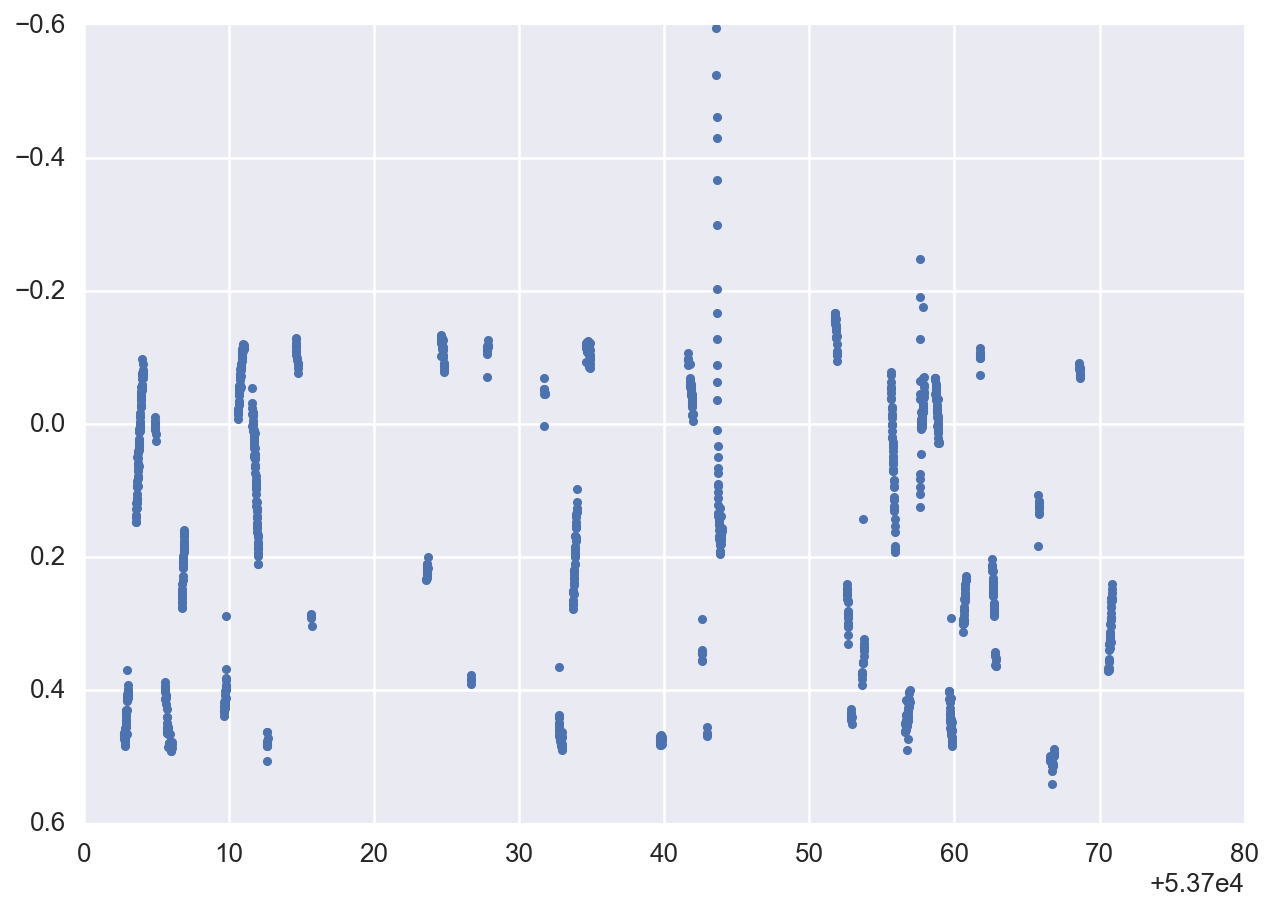

In [21]:
plt.plot(lc_raw['HJD-2400000'], lc_raw.r_band, '.')
plt.ylim(0.6, -0.6)

(0.6, -0.6)

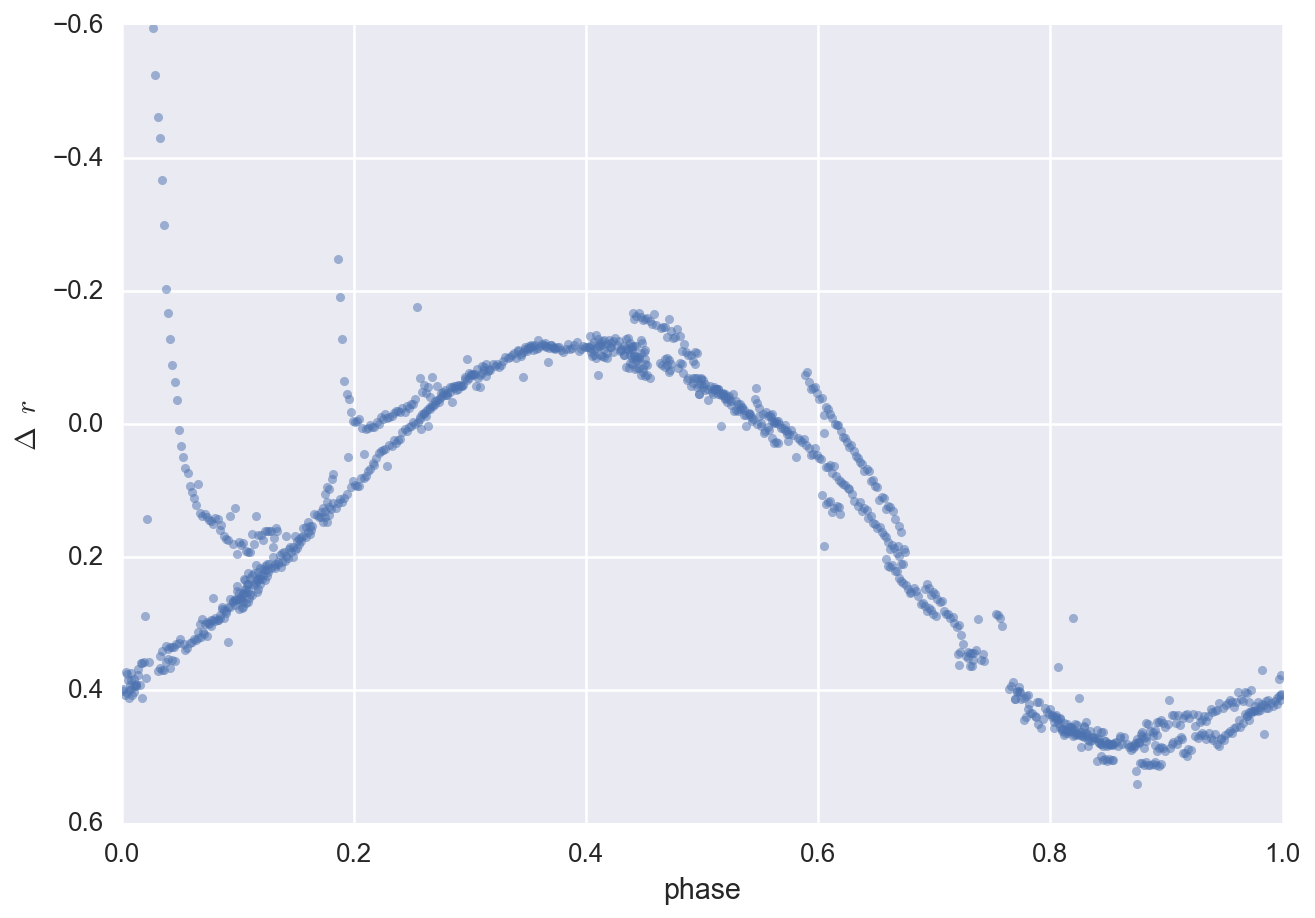

In [22]:
plt.plot(np.mod(lc_raw['HJD-2400000'], 3.375)/3.375, lc_raw.r_band, '.', alpha=0.5)
plt.xlabel('phase')
plt.ylabel('$\Delta \;\; r$')
plt.ylim(0.6, -0.6)

(0.6, -0.6)

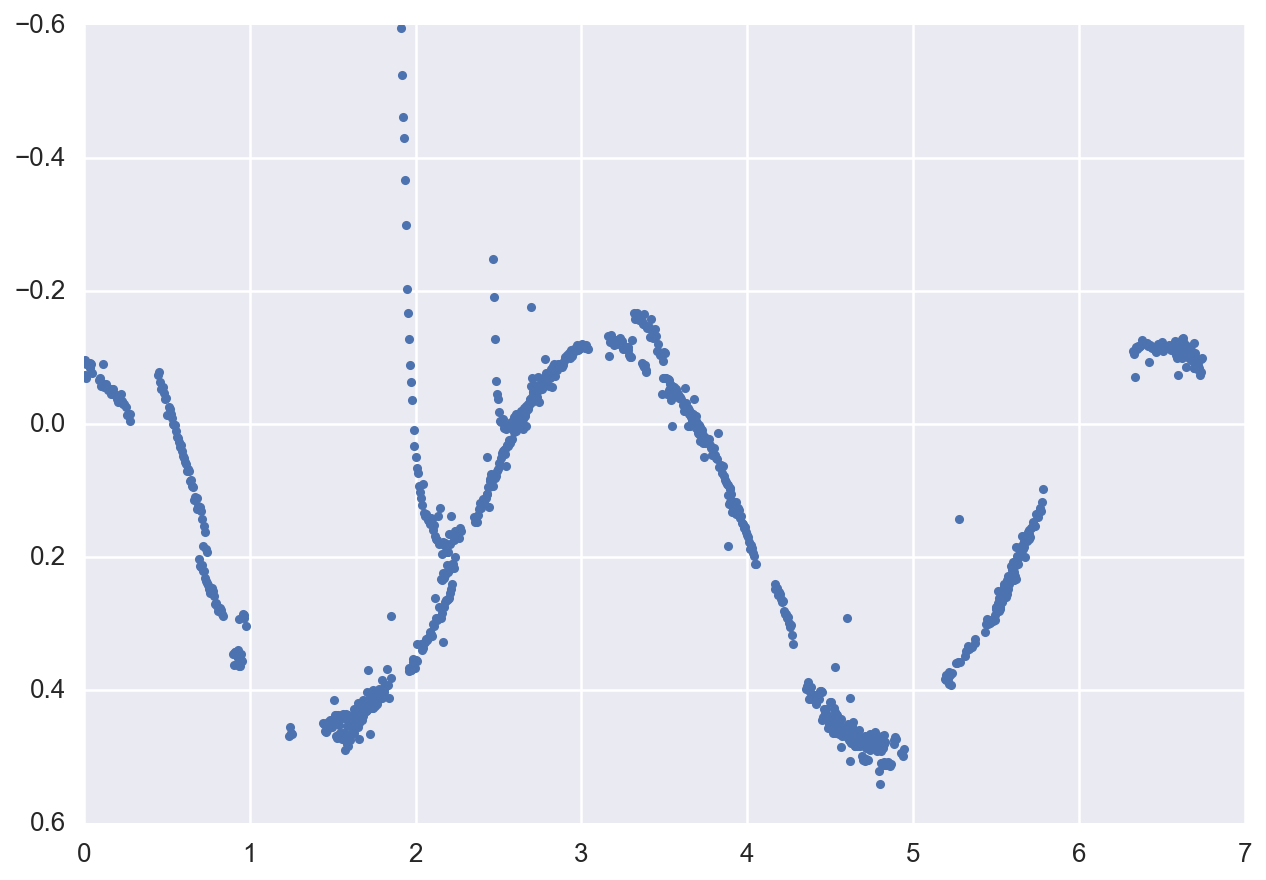

In [23]:
plt.plot(np.mod(lc_raw['HJD-2400000'], 6.74215), lc_raw.r_band, '.')
plt.ylim(0.6, -0.6)

The Devor et al. period is just twice the photometric period of 3.375 days.  
Are those large vertical drops flares?

In [30]:
! ls /Users/gully/Downloads/catalog/T-Tau0-* | head -n 10

/Users/gully/Downloads/catalog/T-Tau0-00397.lc
/Users/gully/Downloads/catalog/T-Tau0-00686.lc
/Users/gully/Downloads/catalog/T-Tau0-00722.lc
/Users/gully/Downloads/catalog/T-Tau0-00781.lc
/Users/gully/Downloads/catalog/T-Tau0-00883.lc
/Users/gully/Downloads/catalog/T-Tau0-01025.lc
/Users/gully/Downloads/catalog/T-Tau0-01104.lc
/Users/gully/Downloads/catalog/T-Tau0-01266.lc
/Users/gully/Downloads/catalog/T-Tau0-01292.lc
/Users/gully/Downloads/catalog/T-Tau0-01540.lc


(0.6, -0.6)

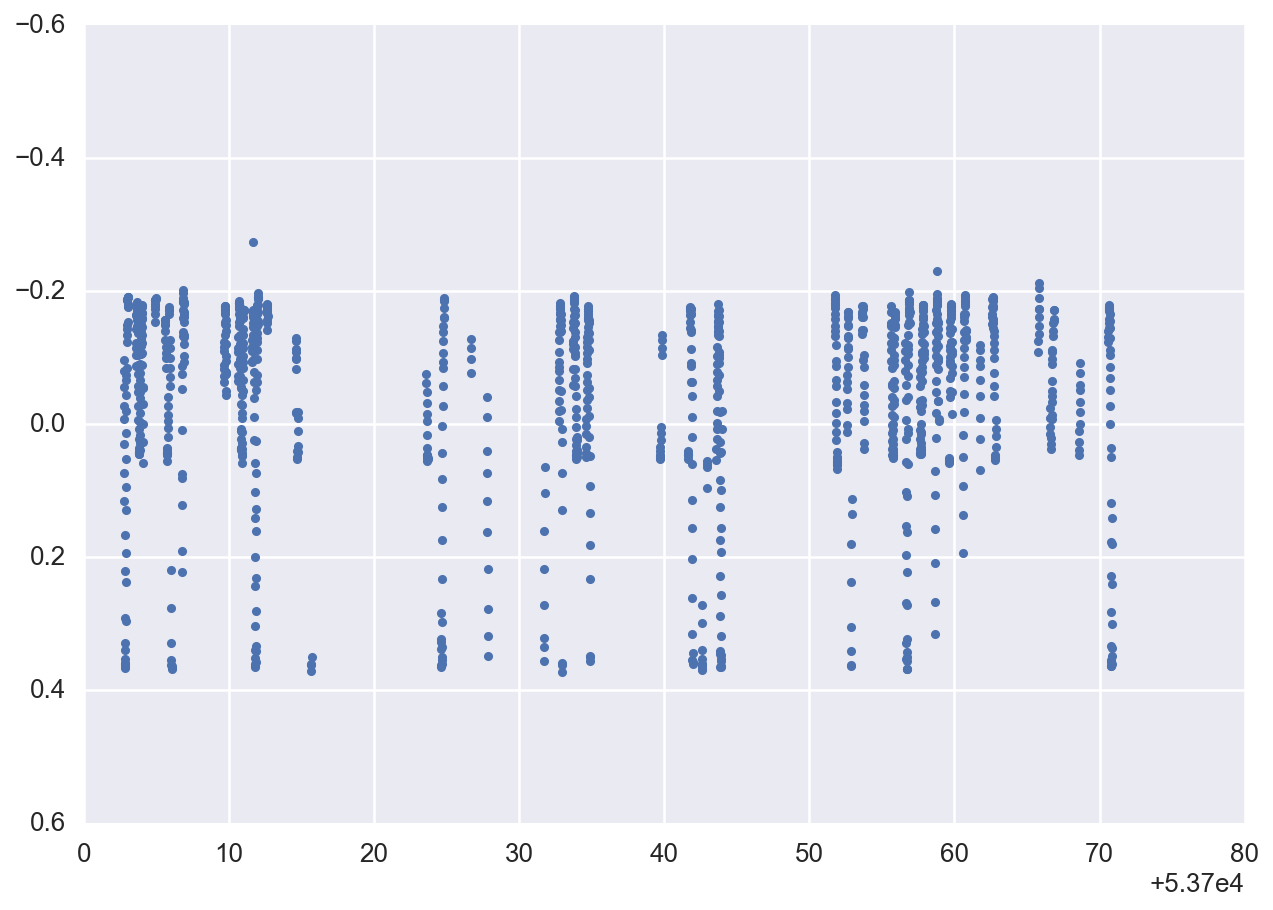

In [34]:
lc2 = pd.read_csv('/Users/gully/Downloads/catalog/T-Tau0-00397.lc', names=cols, delim_whitespace=True)
plt.plot(lc2['HJD-2400000'], lc2.r_band, '.')
plt.ylim(0.6, -0.6)

(0.6, -0.6)

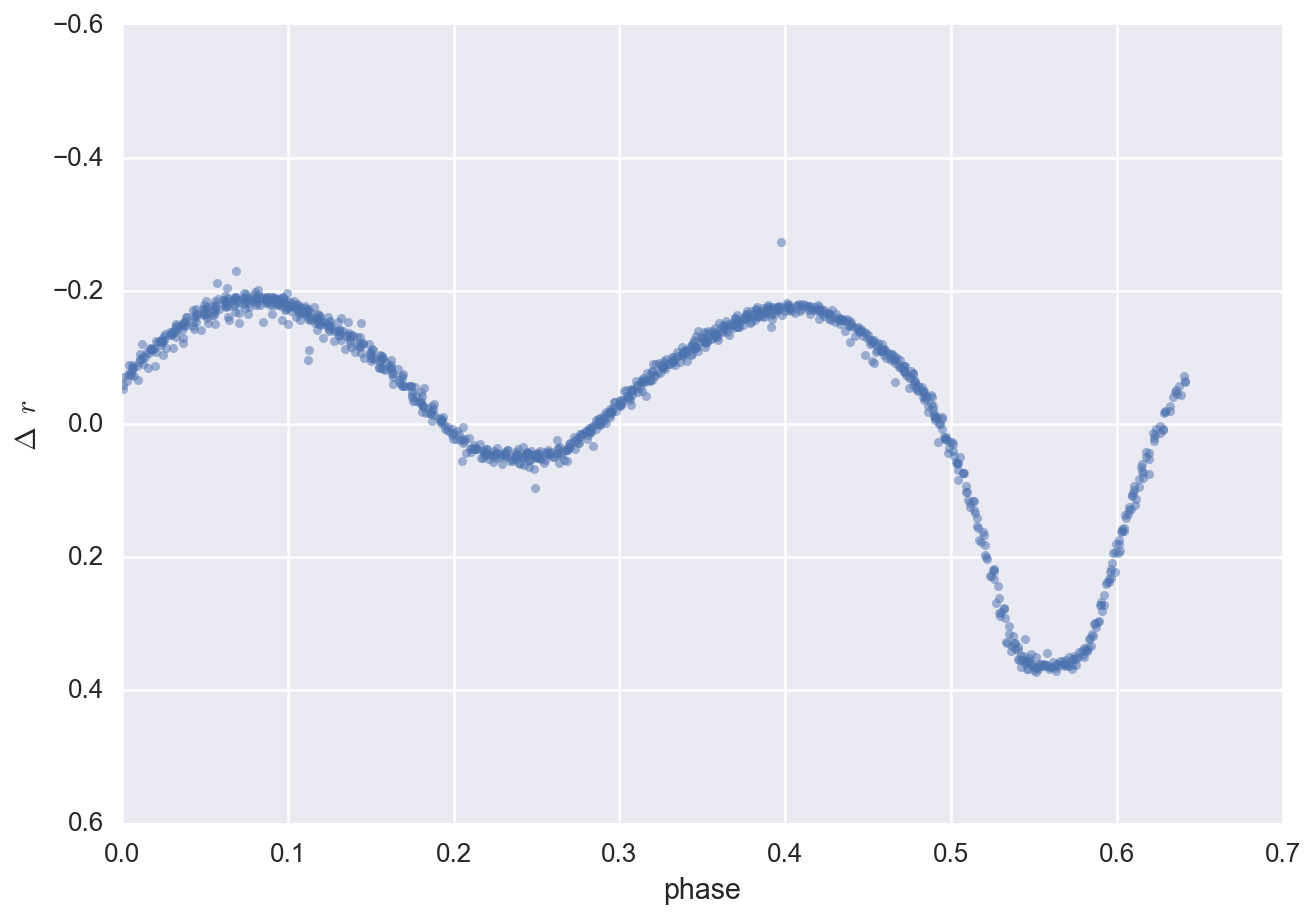

In [46]:
this_p = df.Per[df.Name == 'T-Tau0-00397']
plt.plot(np.mod(lc2['HJD-2400000'], this_p), lc2.r_band, '.', alpha=0.5)
plt.xlabel('phase')
plt.ylabel('$\Delta \;\; r$')
plt.ylim(0.6, -0.6)